# Problemas de Controle Ótimo: Visão Computacional

Notas da prof. Soledad, do minicurso de "Controle ótimo com aplicações à Biologia" - *ICTP LATIN AMERICAN SCHOOLIN APPLIED MATHEMATICS*.

- Notas do livro:

*[Lenhart and Workman, 2007] Lenhart, S. and Workman, J. T. (2007). Optimal control applied to biological models. Chapman and Hall/CRC.*

- Importando pacotes

In [174]:
import numpy as np
import matplotlib.pyplot as plt

## Métodos Numéticos para resolução de equações diferenciais 

Queremos resolver uma equação diferencial, usando apenas o polinômio de Taylor de priemiro grau. $$x(t+h) = x(t) + hx'(t) $$

In [4]:
## Método de Euler

def euler(f,x0,t0,tf,N): # f is a two variable function
    h = (tf - t0)/N
    t = np.linspace(t0,tf,N+1)
    y = np.zeros(N+1)
    y[0] = x0
    for k in range(N):
        y[k+1] = y[k] + h*f(t[k],y[k])
    return t, y

Queremos resolver o problema $$x'(t) = x + e^t + t\cdot x, x(1) = 2 $$

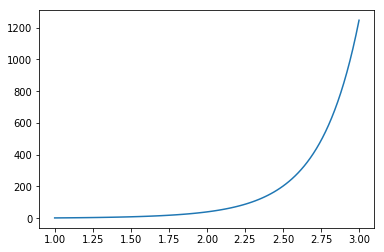

In [5]:
# exercise 2
def f(t,x): return x + np.exp(t) + t*x
t, y = euler(f,2,1,3,100)
mlt.plot(t,y)

Agora, queremos aproximar numericamente a integral $$\int_{0}^{2} e^{-s^2}ds $$ Mas antes, usamos a série de Taylor no grau 4 para resolver $$x' = cos t - sin x + t^2, x(-1) = 3 $$

0.8840459692099212


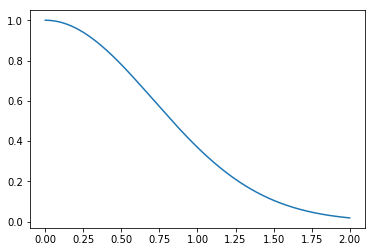

In [6]:
# exercise 3
def f(t,x):  return -2*t*np.exp(-t**2) 
t, y = euler(f,1,0,2,1000)
integral = sum(y[0:1000]*(2-0)/1000)
print(integral)
mlt.plot(t,y)

In [7]:
## Método de Taylor de ordem 4

def orden4(x0, t0, tf, N):
    h = (tf - t0)/N
    t = np.linspace(t0,tf,N+1)
    y = np.zeros(N+1)
    y[0] = x0
    for k in range(N):
        x1 = np.cos(t[k]) - np.sin(t[k]) + t[k]**2
        x2 = -np.sin(t[k]) - x1*np.cos(y[k]) + 2*t[k]
        x3 = -np.cos(t[k]) - x2*np.cos(y[k]) + (x1**2)*np.sin(y[k]) + 2
        x4 = np.sin(t[k]) - x3*np.cos(y[k]) + 3*x1*x2*np.sin(y[k])+ (x1**3)*np.cos(y[k])
        y[k+1] = y[k] + h*(x1 + h/2*(x2 + h/3*(x3+h/4*x4)))
    return t,y

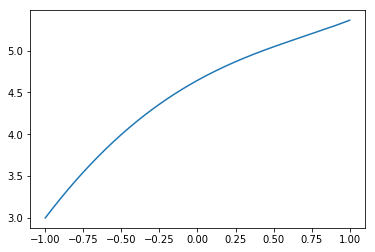

In [8]:
t, y = orden4(3,-1,1,200)
mlt.plot(t,y)

In [9]:
def orden4_4(x0, t0, tf, N):
    h = (tf - t0)/N
    t = np.linspace(t0,tf,N+1)
    y = np.zeros(N+1)
    y[0] = x0
    for k in range(N):
        x1 = 1 + y[k]**2
        x2 = 2*y[k]*x1
        x3 = 2*y[k]*x2 + 2*x1*x1
        x4 = 2*x1*x2 + 2*y[k]*x3 + 4*x1*x2
        y[k+1] = y[k] + h*(x1 + h/2*(x2 + h/3*(x3+h/4*x4)))
    return t,y

Agora, resolvamos $$ x' = 1 + x^2, x(0) = 0 $$

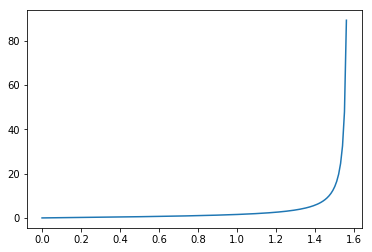

In [10]:
# exercício 4
t, y = orden4_4(0,0,1.56,157)
mlt.plot(t,y)

O método de Runge-Kutta é um pouco mais complexo de se aplicar, porém o erro aproximado é $$O(h^4) $$

In [11]:
## Método Range-Kutta

def ejer4(f,x0,t0,tf,N):
    h = (tf - t0)/N
    t = np.linspace(t0,tf,N+1)
    y = np.zeros(N+1)
    y[0] = x0
    for k in range(N):
        k1 = f(t[k],y[k])
        k2 = f(t[k]+h/2,y[k] + h*k1/2)
        k3 = f(t[k]+h/2,y[k]+h*k2/2)
        k4 = f(t[k] + h, y[k] + h*k3)
        y[k+1] = y[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return t, y

Nesse caso, $$x' = t^{-2}(tx - x^2), x(1) = 2 $$

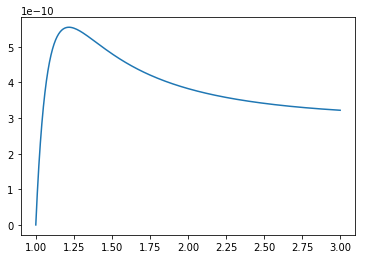

In [12]:
## exercício 5
def f(t,x): return (t**(-2))*(t*x-x**2)
def g(t): return (1/2 + np.log(t))**(-1)*t
t, y = ejer4(f,2,1,3,200)
x = g(t)
#mlt.plot(t,x,t,y)
erro = abs(x-y)
mlt.plot(t,erro)

## Aplicando os métodos numéricos aos problemas sem restrições

## Exercício (exemplo 8.1 - p. 28)

$$
max \int _0 ^1 (Ax^2 + Bu^2) dt \\
sa. x'= -\frac{x^2}{2} + Cu \\
x(0) = x_0 > -2
$$

Resolvendo $H_u$ e substituindo $u$ em $x'$, com as condições de otimalidade, temos o sistema:

$$
\begin{cases}
x'^*(t) & = & -\frac{x^2}{2} +\frac{C^2 \lambda}{2B} \\
\lambda'^*(t) & = & -A + \lambda x^* \\
x^*(0) &=& x_0 > -2 \\
\lambda(1) &=& 0
\end{cases}
$$

Vamos resolvê-lo numericamente, em 4 passos:

0. Inicializamos o algoritmo com $u = 0$ e $\delta = 0.1$ (tolerância)
1. Integramos numericamente $x'^*(t)$ de $t_0 \rightarrow T$ para obter $x$
2. Integramos numericamente $\lambda'^*(t)$ de $T \rightarrow t_0$ para obter $\lambda$
3. Atualiza $u$


In [163]:
## Método Range-Kutta para controle ótimo

def runge_kutta_state(f,x,u,t,h,N,const):
    y = x
    for k in range(N):
        def F(t,x): return f(t,x,u[k],const)
        k1 = F(t[k],y[k])
        k2 = F(t[k]+h/2,y[k] + h*k1/2)
        k3 = F(t[k]+h/2,y[k]+h*k2/2)
        k4 = F(t[k] + h, y[k] + h*k3)
        y[k+1] = y[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

def runge_kutta_adjoint(f,adj,x,t,h,N,const):
    y = adj
    for k in range(N-1,0,-1):        
        k1 = f(t[k],y[k],x[k],const)
        k2 = f(t[k]-h/2,y[k] + h*k1/2,x[k],const)
        k3 = f(t[k]-h/2,y[k] + h*k2/2,x[k],const)
        k4 = f(t[k] - h, y[k] + h*k3,x[k],const)
        y[k-1] = y[k] - (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [167]:
def control_code_1(A,B,C,x0):
    N = 1000
    h = 1/N
    test = -1
    delta = 0.001
    
    t = np.linspace(0,1,N+1)
    u = np.zeros(N+1)
    x = np.zeros(N+1)
    adj = np.zeros(N+1)
    
    x[0] = x0
    
    def f(t,x,u,C): return -1/2*x**2 + C*u
    
    def g(t,adj,x,A): return -A + adj*x
    
    while test < 0:
        
        old_u = u
        old_x = x
        old_adj = adj
        
        x = runge_kutta_state(f,x,u,t,h,N,C)
        
        adj = runge_kutta_adjoint(g,adj,x,t,h,N,A)
        
        u = 0.5*(C*adj/(2*B) + old_u) 
        
        temp1 = delta*sum(abs(u)) - sum(abs(old_u - u))
        temp2 = delta*sum(abs(x)) - sum(abs(old_x - x))
        temp3 = delta*sum(abs(adj)) - sum(abs(old_adj - adj))
        test = min(temp1,temp2,temp3)
        
    return t,x,u,adj

### Aplicação Numérica

In [175]:
A, B, C,x0 = 1,1,4,1
t,x,u,adj = control_code_1(A,B,C,x0)

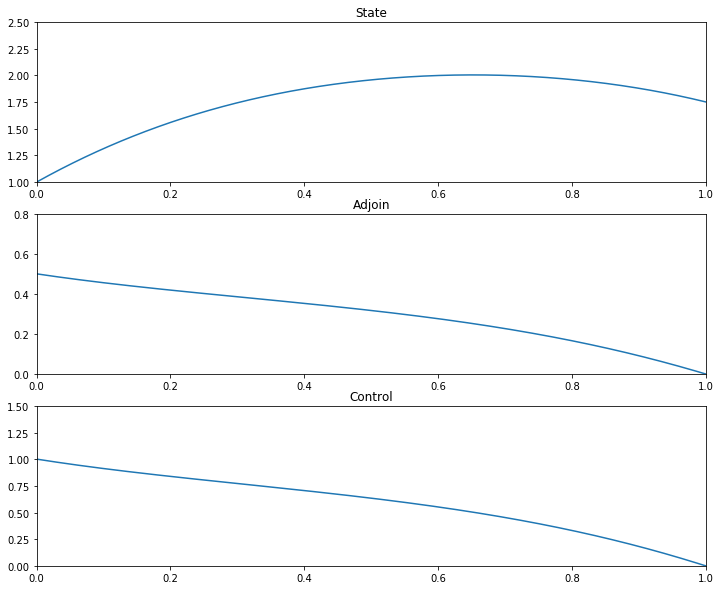

In [194]:
fig = plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
plt.plot(t, x)
plt.ylim([1,2.5])
plt.xlim([0,1])
plt.title('State')
plt.subplot(3,1,2)
plt.plot(t, adj)
plt.ylim([0,0.8])
plt.xlim([0,1])
plt.title('Adjoin')
plt.subplot(3,1,3)
plt.plot(t, u)
plt.ylim([0,1.5])
plt.xlim([0,1])
plt.title('Control')
plt.show()